In [113]:
#IMPORTAÇÃO DE BIBLIOTECAS
#!pip install -q glove_python
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import string
import joblib


nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('universal_tagset')
nltk.download('wordnet')
lemmatizer = nltk.WordNetLemmatizer()

from bs4 import BeautifulSoup  
import re
import nltk
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk import sent_tokenize, word_tokenize, pos_tag

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.svm import SVC

[nltk_data] Downloading package stopwords to C:\Users\Marcelo
[nltk_data]     Rocha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Marcelo
[nltk_data]     Rocha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Marcelo Rocha\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to C:\Users\Marcelo
[nltk_data]     Rocha\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to C:\Users\Marcelo
[nltk_data]     Rocha\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package universal_tagset to C:\Users\Marcelo
[nltk_data]     Rocha\AppData\Roaming\

In [115]:
#IMPORTAÇÃO DE BIBLIOTECAS

from itertools import *
from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle
from sklearn.model_selection import learning_curve


from nltk.corpus import wordnet

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.sparse import csr_matrix
import numpy as np
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, make_scorer
from sklearn.metrics import f1_score


from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm
from sklearn.model_selection import cross_val_score

from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

from wordcloud import WordCloud
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from imblearn.under_sampling import ClusterCentroids
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
# from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import NearMiss, RandomUnderSampler

from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import (
    Dense, Dropout, Activation, Lambda,
    Embedding, Conv1D,
    LSTM, SimpleRNN, GRU
)
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential


import logging
from gensim.models import word2vec
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors
#importing the glove library
#from glove import Corpus, Glove

In [117]:

# 4. Carrega o JSON no DataFrame
df = pd.read_excel('cleaned_reviews.xlsx')

# 5. Visualiza as primeiras linhas
df.head()

,sentiments,cleaned_review,cleaned_review_length,review_score
0,positive,i wish would have gotten one earlier love it a...,19,5
1,neutral,i ve learned this lesson again open the packag...,88,1
2,neutral,it is so slow and lags find better option,9,2
3,neutral,roller ball stopped working within months of m...,12,1
4,neutral,i like the color and size but it few days out ...,21,1


In [119]:
df['sentiments'].value_counts()

sentiments
positive    9507
neutral     6307
negative    1538
Name: count, dtype: int64

In [121]:
df.isnull().sum()

sentiments               0
cleaned_review           3
cleaned_review_length    0
review_score             0
dtype: int64

In [133]:
df = df.dropna(subset=['cleaned_review'])
df.isnull().sum()

sentiments               0
cleaned_review           0
cleaned_review_length    0
review_score             0
sentiments_final         0
dtype: int64

In [135]:
def map_sentiment(sentiment):
    if sentiment == "negative":
        return 0   # Negativo
    elif sentiment == "neutral":
        return 1   # Neutro
    else:
        return 2   # Positivo


df['sentiments_final'] = df['sentiments'].apply(map_sentiment)

In [137]:
df['sentiments_final'].value_counts()

sentiments_final
2    9507
1    6304
0    1538
Name: count, dtype: int64

<Axes: xlabel='sentiments_final'>

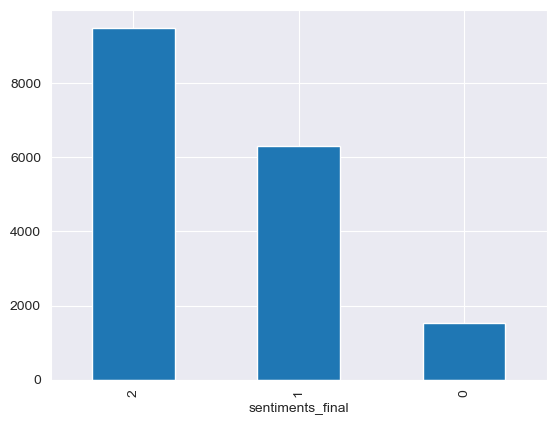

In [139]:
df['sentiments_final'].value_counts().plot(kind='bar')

In [21]:
# # Descobrir tamanho da menor classe
# min_class_size = df['sentiments_final'].value_counts().min()

# # Fazer undersampling em cada classe
# df_balanced = (
#     df.groupby('sentiments_final', group_keys=False)
#       .apply(lambda x: x.sample(n=min_class_size, random_state=42))
# )

# # Embaralhar o dataset final
# df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Verificar
df_balanced = df.copy()
df_balanced['sentiments_final'].value_counts()


sentiments_final
2    9507
1    6304
0    1538
Name: count, dtype: int64

In [141]:
print("Tamanho do Dataset",df_balanced.shape)

Tamanho do Dataset (17349, 5)


Distribuição de sentimentos


<Axes: xlabel='sentiments_final'>

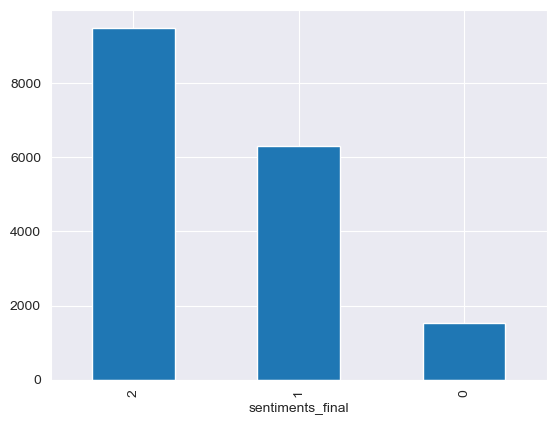

In [143]:
print('Distribuição de sentimentos')
df_balanced['sentiments_final'].value_counts().plot(kind='bar')

In [145]:
X = df_balanced['cleaned_review'] #o conteúdo textual das avaliações
y = df_balanced['sentiments_final'] #correspondente ao sentimento associado a cada avaliação.

In [147]:
# Config globais (evita recarregar na função)
STOP_WORDS = set(stopwords.words('english'))
# Preservar mais negações para melhor análise de sentimentos
NEGATIONS = ['not', 'no', 'never', 'neither', 'nor', 'cannot', "can't", 'nothing', 'none', 'nowhere', 'nobody']
for word in NEGATIONS:
    STOP_WORDS.discard(word)
STOP_WORDS
LEMMATIZER = WordNetLemmatizer()
STEMMER = SnowballStemmer('english')


def clean_review(text: str, 
                 remove_stopwords: bool = True,
                 lemmatize: bool = True,
                 stem: bool = False,  # Opcional, para comparação com o original
                 remove_numbers: bool = False,
                 return_tokens: bool = False) -> str | list[str]:
    """
    Função de limpeza otimizada para reviews da Amazon. 
    Compatível com TF-IDF/Word2Vec e modelos como MNB, LR, SVM, KNN, AdaBoost.
    
    Parâmetros:
    - text: texto bruto
    - remove_stopwords: remover stopwords (preservando negações)
    - lemmatize: aplicar lematização (recomendado)
    - stem: aplicar stemming (alternativa, mas menos precisa)
    - remove_numbers: remover números (ex: preços)
    - return_tokens: devolver lista de tokens (para Word2Vec) ou string (para TF-IDF)
    
    Retorna: string limpa ou lista de tokens
    """
    if pd.isna(text) or not isinstance(text, str):
        return "" if not return_tokens else []
    
    # 1. Remover HTML
    text = BeautifulSoup(text, "lxml").get_text()
    
    # 2. Minúsculas
    text = text.lower()
    
    # 3. Remover indesejados
    pattern = r'[^a-z\s]' if remove_numbers else r'[^a-z0-9\s]'
    text = re.sub(pattern, ' ', text)
    
    # 4. Tokenização precisa
    tokens = word_tokenize(text)
    
    # 5. Remover stopwords
    if remove_stopwords:
        tokens = [t for t in tokens if t not in STOP_WORDS and len(t) > 1]  # Ignora tokens muito curtos
    
    # 6. Lematização ou stemming
    if lemmatize:
        tokens = [LEMMATIZER.lemmatize(t) for t in tokens]
    elif stem:
        tokens = [STEMMER.stem(t) for t in tokens]
    
    # 7. Retornar
    if return_tokens:
        return tokens
    return ' '.join(tokens)

In [149]:
X_cleaned = []
X_cleaned = [clean_review(text, remove_stopwords=True, lemmatize=True, remove_numbers=True) 
                     for text in X]

In [151]:
len(X_cleaned)

17349

In [153]:
#Classificação de texto usando Bag of Words com CountVectorizer

# Configuração recomendada
countVect = CountVectorizer(
    min_df=5,               # ignora palavras muito raras (<5 documentos)
    max_df=0.85,            # ignora palavras muito frequentes (>85% dos documentos)
    max_features=8000,     # mantém apenas as 10k palavras/ngrams mais frequentes
    ngram_range=(1,2),      # unigrams e bigrams (captura expressões como "not good")
    strip_accents='unicode',# remove acentos
    binary=False,            # presença/ausência da palavra é suficiente para classificação
    token_pattern=r'\b\w+\b' # ignora símbolos isolados, pega apenas palavras
)


X_all_countVect = countVect.fit_transform(X_cleaned)

feature_names = countVect.get_feature_names_out()

print("Number of features : %d\n" % len(feature_names))
print("Show some feature names:\n", feature_names[::1000])

Number of features : 8000

Show some feature names:
 ['aa' 'choice' 'excellent speaker' 'hold long' 'mentioned' 'pandemic'
 'setup mouse' 'tried another']


In [1055]:
#Classificação de texto usando TF-IDF com TfidfVectorizer
tfidf = TfidfVectorizer(
    min_df=5,
    max_df=0.85,
    max_features=12000,      # 🔥 mais adequado para 4600 docs
    ngram_range=(1,2),
    strip_accents='unicode',
    norm='l2',
    use_idf=True,
    smooth_idf=True,
    sublinear_tf=True
)

X_all_tfidf = tfidf.fit_transform(X_cleaned)

print(f"Vocabulário TF-IDF: {X_all_tfidf.shape[1]:,} termos")
print("Exemplos de features:\n", tfidf.get_feature_names_out()[::1500][:20])

Vocabulário TF-IDF: 10,839 termos
Exemplos de features:
 ['aa' 'color got' 'flaw' 'last around' 'multiple device'
 'quality horrible' 'subdued' 'work love']


In [1063]:
#WORD EMBEDDING
# Vamos assumir que X_cleaned já é a lista de strings limpas
X_tokens = [word_tokenize(text) for text in X_cleaned]

#print(X_tokens[0][:10])  # exemplo de tokens do primeiro review

# Caminho para o arquivo .txt do GloVe
glove_file = 'glove.6B/glove.6B.100d.txt'

# Carregar embeddings
embeddings_index = {}
with open(glove_file, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = vector

print(f"Número de palavras no GloVe: {len(embeddings_index)}")
#-----------------------------------------------------------------------------
embedding_dim = 100  # depende do GloVe que você baixou

def review_to_vec(tokens, embeddings_index, embedding_dim):
    vecs = []
    for t in tokens:
        if t in embeddings_index:
            vecs.append(embeddings_index[t])
    if len(vecs) > 0:
        return np.mean(vecs, axis=0)  # média das palavras
    else:
        return np.zeros(embedding_dim)

# Transformar todas as reviews
X_embeddings = np.array([review_to_vec(tokens, embeddings_index, embedding_dim) for tokens in X_tokens])

print(X_embeddings.shape)  # deve dar (4602, 100)


Número de palavras no GloVe: 400000
(17349, 100)


In [155]:

# X_all_countVect já é a matriz de features (CountVectorizer)
# y é a coluna 'sentiment'

# Dividir em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X_all_countVect,
    y,
    test_size=0.2,         # 20% para teste
    random_state=42,       # para reprodutibilidade
    stratify=y             # mantém proporção de classes
)


target_names = ['Negative', 'Neutral' , 'Positive']

# Verificar distribuição das classes
print("Distribuição no treino:")
print(y_train.value_counts())
print("\nDistribuição no teste:")
print(y_test.value_counts())

print(X_train.shape, X_test.shape)


Distribuição no treino:
sentiments_final
2    7606
1    5043
0    1230
Name: count, dtype: int64

Distribuição no teste:
sentiments_final
2    1901
1    1261
0     308
Name: count, dtype: int64
(13879, 8000) (3470, 8000)


In [161]:
def knn_classifier(X_train_countVect,y_train,X_test_countVect,y_test,target_names, save_path=None): 
    
    classifier=KNeighborsClassifier(n_neighbors=5)
    classifier.fit(X_train_countVect,y_train)

    y_pred=classifier.predict(X_test_countVect)

    y_pred_train = classifier.predict(X_train_countVect)
    print('KNN Results:')
    print("KNN Accuracy:",metrics.accuracy_score(y_test,y_pred))
    print(classification_report(y_test, y_pred, target_names=target_names))
    print("Confusion Matrix",confusion_matrix(y_test, y_pred))    
    print("KNN Train Accuracy:",metrics.accuracy_score(y_train,y_pred_train))
    #print(classification_report(y_train, y_pred_train, target_names=target))

     # Salvar modelo se o caminho for passado
      # 💾 Guardar modelo
    if save_path is not None:
        joblib.dump(classifier, save_path)
        print(f"Modelo KNN guardado em: {save_path}")


    return classifier, metrics.accuracy_score(y_test,y_pred), f1_score(y_test, y_pred, average='weighted')

In [163]:
# Chamar a função e receber Accuracy e F1 score
knn, knn_acc, knn_f1 = knn_classifier(X_train, y_train, X_test, y_test, target_names, save_path="../Exame/modelos/modelo_knn.joblib")

# Imprimir resultados
print("Resultados do KNN:")
print("Accuracy:", knn_acc)
print("F1 Score (weighted):", knn_f1)

KNN Results:
KNN Accuracy: 0.6887608069164265
              precision    recall  f1-score   support

    Negative       0.51      0.07      0.12       308
     Neutral       0.55      0.92      0.69      1261
    Positive       0.91      0.64      0.75      1901

    accuracy                           0.69      3470
   macro avg       0.66      0.54      0.52      3470
weighted avg       0.75      0.69      0.67      3470

Confusion Matrix [[  21  269   18]
 [   7 1155   99]
 [  13  674 1214]]
KNN Train Accuracy: 0.7472440377548815
Modelo KNN guardado em: ../Exame/modelos/modelo_knn.joblib
Resultados do KNN:
Accuracy: 0.6887608069164265
F1 Score (weighted): 0.6721510718379936


In [165]:
def nb_classifier(X_train_countVect, y_train, X_test_countVect, y_test, target_names, save_path=None): 
    # Criar e treinar o classificador
    clf = MultinomialNB()
    clf.fit(X_train_countVect.toarray(), y_train)  # .toarray() para MultinomialNB

    # Predição
    y_pred = clf.predict(X_test_countVect)
    y_pred_train = clf.predict(X_train_countVect)

    # Resultados
    print('Naive Bayes Results:')
    print("MNB Test Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=target_names))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))    
    print("MNB Train Accuracy:", metrics.accuracy_score(y_train, y_pred_train))
    #print(classification_report(y_train, y_pred_train, target_names=target_names))

       # 💾 Guardar modelo
    if save_path is not None:
        joblib.dump(clf, save_path)
        print(f"Modelo Naive de Bayes guardado em: {save_path}")

    # Retornar Accuracy e F1-score
    return clf, metrics.accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='weighted')

In [167]:
nb, nb_acc, nb_f1 = nb_classifier(X_train, y_train, X_test, y_test, target_names, save_path="../Exame/modelos/modelo_naive_bayes.joblib")

print("\nResultados do Naive Bayes:")
print("Accuracy:", nb_acc)
print("F1 Score (weighted):", nb_f1)

Naive Bayes Results:
MNB Test Accuracy: 0.7302593659942364
              precision    recall  f1-score   support

    Negative       0.53      0.52      0.52       308
     Neutral       0.70      0.55      0.62      1261
    Positive       0.77      0.89      0.82      1901

    accuracy                           0.73      3470
   macro avg       0.67      0.65      0.65      3470
weighted avg       0.72      0.73      0.72      3470

Confusion Matrix:
 [[ 159  109   40]
 [ 108  691  462]
 [  31  186 1684]]
MNB Train Accuracy: 0.7962389221125441
Modelo Naive de Bayes guardado em: ../Exame/modelos/modelo_naive_bayes.joblib

Resultados do Naive Bayes:
Accuracy: 0.7302593659942364
F1 Score (weighted): 0.7215450136276536


In [157]:
# Logistic Regression
def lr_classifier(X_train_countVect,y_train,X_test_countVect,y_test,target_names, save_path=None): 
  lr = LogisticRegression(class_weight='balanced', max_iter=1000)
  lr.fit(X_train_countVect, y_train)


  y_pred=lr.predict(X_test_countVect)

  y_pred_train =lr.predict(X_train_countVect)
  print('LR Results:')
  #   y_pred_train =clf.predict(countVect.transform(X_test_cleaned))
  print("LR Accuracy:",metrics.accuracy_score(y_test,y_pred))
  print(classification_report(y_test, y_pred, target_names=target_names))
  print("Confusion Matrix",confusion_matrix(y_test, y_pred))    
  print("LR Train Accuracy:",metrics.accuracy_score(y_train,y_pred_train))
  #print(classification_report(y_train, y_pred_train, target_names=target_names))

    # 💾 Guardar modelo
  if save_path is not None:
    joblib.dump(lr, save_path)
    print(f"Modelo Logistic Regression guardado em: {save_path}")
  
  return lr, metrics.accuracy_score(y_test,y_pred), f1_score(y_test, y_pred, average='weighted')

In [159]:
lr, lr_acc, lr_f1 = lr_classifier(X_train, y_train, X_test, y_test, target_names, save_path="../Exame/modelos/modelo_logistic_regression.joblib")

print("\nResultados do Logistic Regression:")
print("Accuracy:", lr_acc)
print("F1 Score (weighted):", lr_f1)

LR Results:
LR Accuracy: 0.8887608069164266
              precision    recall  f1-score   support

    Negative       0.74      0.72      0.73       308
     Neutral       0.85      0.88      0.86      1261
    Positive       0.94      0.92      0.93      1901

    accuracy                           0.89      3470
   macro avg       0.84      0.84      0.84      3470
weighted avg       0.89      0.89      0.89      3470

Confusion Matrix [[ 223   70   15]
 [  65 1105   91]
 [  13  132 1756]]
LR Train Accuracy: 0.9827797391742921
Modelo Logistic Regression guardado em: ../Exame/modelos/modelo_logistic_regression.joblib

Resultados do Logistic Regression:
Accuracy: 0.8887608069164266
F1 Score (weighted): 0.8890400327796997


In [169]:
# #   Decision Trees
def dt_classifier(X_train_countVect,y_train,X_test_countVect,y_test,target_names, save_path=None): 
  clf = AdaBoostClassifier(n_estimators=400,learning_rate=1,algorithm='SAMME')
  clf.fit(X_train_countVect,y_train)
  
  y_pred=clf.predict(X_test_countVect)
  
  y_pred_train =clf.predict(X_train_countVect)


  print('Adaboosting Results:')
  print("Adaboosting DT Accuracy:",metrics.accuracy_score(y_test,y_pred))
  print(classification_report(y_test, y_pred, target_names=target_names))
  print("Confusion Matrix",confusion_matrix(y_test, y_pred))    
  print("Adaboosting DT Train Accuracy:",metrics.accuracy_score(y_train,y_pred_train))
  #print(classification_report(y_train, y_pred_train, target_names=target_names))

          # 💾 Guardar modelo
  if save_path is not None:
    joblib.dump(clf, save_path)
    print(f"Modelo Decision Trees guardado em: {save_path}")
  
  return clf, metrics.accuracy_score(y_test,y_pred), f1_score(y_test, y_pred, average='weighted')

In [171]:
dt, dt_acc, dt_f1 = dt_classifier(X_train, y_train, X_test, y_test, target_names, save_path="../Exame/modelos/modelo_decision_trees.joblib")

print("\nResultados do Decision Tree:")
print("Accuracy:", dt_acc)
print("F1 Score (weighted):", dt_f1)

Adaboosting Results:
Adaboosting DT Accuracy: 0.767435158501441
              precision    recall  f1-score   support

    Negative       0.71      0.08      0.15       308
     Neutral       0.64      0.89      0.74      1261
    Positive       0.90      0.80      0.85      1901

    accuracy                           0.77      3470
   macro avg       0.75      0.59      0.58      3470
weighted avg       0.79      0.77      0.75      3470

Confusion Matrix [[  25  252   31]
 [   8 1119  134]
 [   2  380 1519]]
Adaboosting DT Train Accuracy: 0.7741912241515959
Modelo Decision Trees guardado em: ../Exame/modelos/modelo_decision_trees.joblib

Resultados do Decision Tree:
Accuracy: 0.767435158501441
F1 Score (weighted): 0.7472049496624944


In [173]:
#SVM
def svc_classifier(X_train_countVect,y_train,X_test_countVect,y_test,target_names, save_path=None): 
  from sklearn import svm
  clf=svm.SVC(kernel='linear', class_weight='balanced', probability=True)
  clf.fit(X_train_countVect,y_train)

  y_pred=clf.predict(X_test_countVect)
  
  y_pred_train =clf.predict(X_train_countVect)

# scores = cross_val_score(clf, iris.data, iris.target, cv=5)
# print("scores",scores.avg)
  print('SVM Results:')
  print("SVM Accuracy:",metrics.accuracy_score(y_test,y_pred))
  print(classification_report(y_test, y_pred, target_names=target_names))
  print("Confusion Matrix",confusion_matrix(y_test, y_pred))    
  print("SVM Train Accuracy:",metrics.accuracy_score(y_train,y_pred_train))
  #print(classification_report(y_train, y_pred_train, target_names=target_names))

            # 💾 Guardar modelo
  if save_path is not None:
    joblib.dump(clf, save_path)
    print(f"Modelo SVM guardado em: {save_path}")

  return clf, metrics.accuracy_score(y_test,y_pred), f1_score(y_test, y_pred, average='weighted')
  

In [175]:
svm, svm_acc, svm_f1 = svc_classifier(X_train, y_train, X_test, y_test, target_names, save_path="../Exame/modelos/modelo_svm.joblib")

print("\nResultados do SVM:")
print("Accuracy:", svm_acc)
print("F1 Score (weighted):", svm_f1)

SVM Results:
SVM Accuracy: 0.8847262247838616
              precision    recall  f1-score   support

    Negative       0.72      0.73      0.73       308
     Neutral       0.84      0.87      0.85      1261
    Positive       0.94      0.92      0.93      1901

    accuracy                           0.88      3470
   macro avg       0.84      0.84      0.84      3470
weighted avg       0.89      0.88      0.89      3470

Confusion Matrix [[ 224   74   10]
 [  67 1091  103]
 [  18  128 1755]]
SVM Train Accuracy: 0.9894084588226818
Modelo SVM guardado em: ../Exame/modelos/modelo_svm.joblib

Resultados do SVM:
Accuracy: 0.8847262247838616
F1 Score (weighted): 0.8851105359898419


In [177]:
# Random Forest
def rf_classifier(X_train_countVect, y_train, X_test_countVect, y_test, target_names, save_path=None): 
    
    clf = RandomForestClassifier(
        n_estimators=300,        # número de árvores
        max_depth=None,          # deixa crescer (pode testar 30 ou 50)
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=42,
        n_jobs=-1                # usa todos os cores da CPU
    )
    
    clf.fit(X_train_countVect, y_train)
    
    y_pred = clf.predict(X_test_countVect)
    y_pred_train = clf.predict(X_train_countVect)

    print('Random Forest Results:')
    print("RF Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=target_names))
    print("Confusion Matrix", confusion_matrix(y_test, y_pred))    
    print("RF Train Accuracy:", metrics.accuracy_score(y_train, y_pred_train))

           # 💾 Guardar modelo
    if save_path is not None:
        joblib.dump(clf, save_path)
        print(f"Modelo Random Forest guardado em: {save_path}")
    
    return clf, metrics.accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='weighted')


In [179]:
rf, rf_acc, rf_f1 = rf_classifier(X_train, y_train, X_test, y_test, target_names, save_path="../Exame/modelos/modelo_random_forest.joblib")

print("\nResultados do Random Forest:")
print("Accuracy:", rf_acc)
print("F1 Score (weighted):", rf_f1)

Random Forest Results:
RF Accuracy: 0.8801152737752161
              precision    recall  f1-score   support

    Negative       0.99      0.51      0.67       308
     Neutral       0.83      0.89      0.86      1261
    Positive       0.91      0.93      0.92      1901

    accuracy                           0.88      3470
   macro avg       0.91      0.78      0.82      3470
weighted avg       0.89      0.88      0.88      3470

Confusion Matrix [[ 157  108   43]
 [   1 1120  140]
 [   1  123 1777]]
RF Train Accuracy: 0.9997838460984221
Modelo Random Forest guardado em: ../Exame/modelos/modelo_random_forest.joblib

Resultados do Random Forest:
Accuracy: 0.8801152737752161
F1 Score (weighted): 0.8756042060565202


In [103]:
#GUARDAR COUNTVECTORIZER , TFIDFVECTORIZER E WORD EMBEDDINGS

#joblib.dump(countVect, "../Exame/modelos/count_vectorizer_2.joblib" )
#joblib.dump(tfidf, "../Exame/modelos/tf_idf_vectorizer_2.joblib" )


['../Exame/modelos/count_vectorizer_2.joblib']

In [109]:
#TESTAR MODELOS

target_names = ['Negative', 'Neutral' , 'Positive']

# carregar
countVect = joblib.load("../Exame/modelos/count_vectorizer_2.joblib") #carregar o countVectorizer (transforma texto em números)
modelo = joblib.load("../Exame/modelos/modelo_logistic_regression.joblib") #carregar modelo

# frase nova

frases = [
    "I absolutely loved this product, it works perfectly.",
    "This is one of the best experiences I have ever had.",
    "The service was excellent and the quality exceeded my expectations.",
    "Amazing product, totally worth the money.",
    "Everything was great, I would definitely recommend it.",
    "the product was normal too",
    "that's a good ball "
]

# frases = [
#     "This product is terrible and completely useless.",
#     "I am very disappointed, it stopped working after one day.",
#     "The quality is poor and the service was awful",
#     "Waste of money, I regret buying this.",
#     "It was a horrible experience and I will not buy this again.",
#     "this product was so good"
# ]

# frases = [
#     "The product arrived on time and works as expected.",
#     "It is okay, nothing special but not bad either.",
#     "The service was acceptable and the product matches the description.",
#     "This product does what it is supposed to do..",
#     "The experience was average and met my basic expectations.",
#     "excellent"
# ]

# frases = [
#     "The product is disappointing and did not meet my expectations.",
#     "I had an awful experience with the customer service.",
#     "The quality of this item is poor and feels cheap.",
#     "This restaurant served poor food and the waiter was rude.",
#     "The movie was disappointing, boring, and too long.",
#     "I had a bad experience with the shipping; it arrived late.",
#     "The phone stopped working after a week, very poor quality.",
#     "The hotel was awful, dirty, and the staff was unhelpful.",
#     "I found this book to be disappointing, poorly written.",
#     "The service was awful and not at all what I expected.",
#     "The software is buggy and performs poorly on my computer.",
#     "The chair is uncomfortable and made of poor materials.",
#     "good"
# ]

# preprocessamento
frases_limpas = []
frases_limpas = [clean_review(text, remove_stopwords=True, lemmatize=True, remove_numbers=True) 
                     for text in frases]



# prever
for frase in frases_limpas:
    X = countVect.transform([frase]) # vetorizar (transforma texto em números)
    proba = modelo.predict_proba(X)[0]   # probabilidades
    pred = proba.argmax()                # classe com maior probabilidade

    print(f'"{frase}" → {target_names[pred]}')
    #print(f'   Confiança: {proba[pred]*100:.2f}%')


"absolutely loved product work perfectly" → Positive
"one best experience ever" → Positive
"service excellent quality exceeded expectation" → Positive
"amazing product totally worth money" → Positive
"everything great would definitely recommend" → Positive
"product normal" → Neutral
"good ball" → Neutral



================ Avaliando Logistic Regression ================


==== Logistic Regression - Confusion Matrix - Detalhes por classe ====

Classe 'Negative':
  TP = 223, FP = 78, FN = 85, TN = 3084

Classe 'Neutral':
  TP = 1105, FP = 202, FN = 156, TN = 2007

Classe 'Positive':
  TP = 1756, FP = 106, FN = 145, TN = 1463


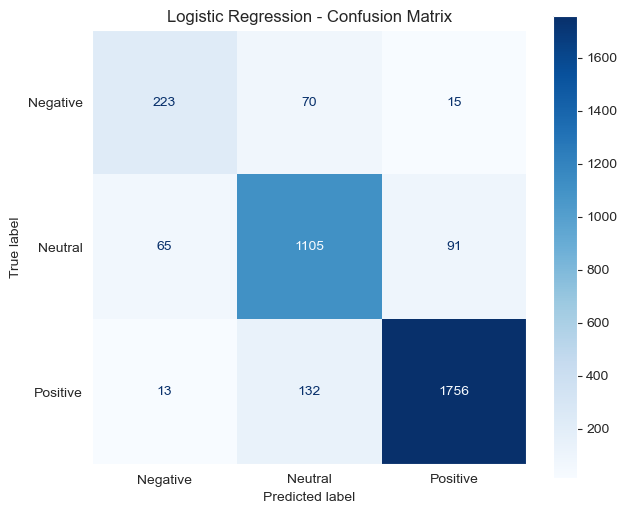

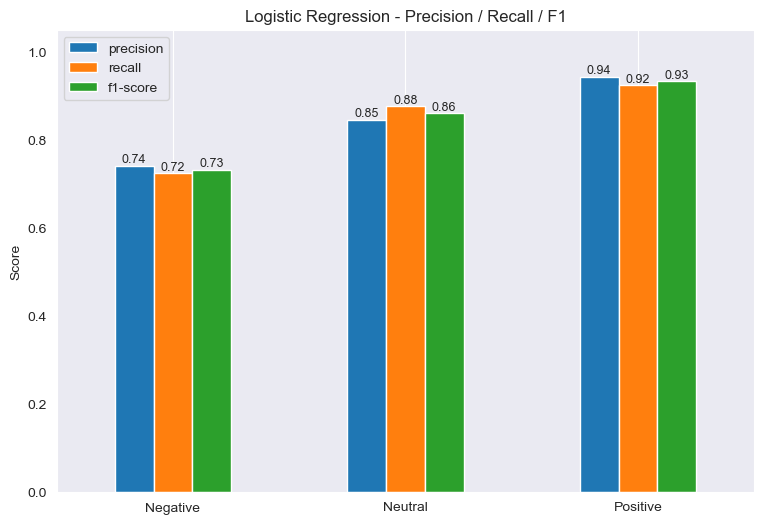

              precision    recall  f1-score   support

    Negative       0.74      0.72      0.73       308
     Neutral       0.85      0.88      0.86      1261
    Positive       0.94      0.92      0.93      1901

    accuracy                           0.89      3470
   macro avg       0.84      0.84      0.84      3470
weighted avg       0.89      0.89      0.89      3470



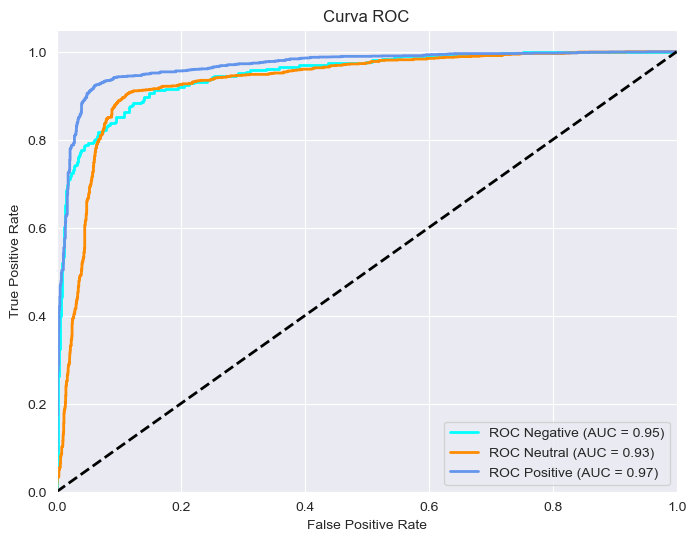

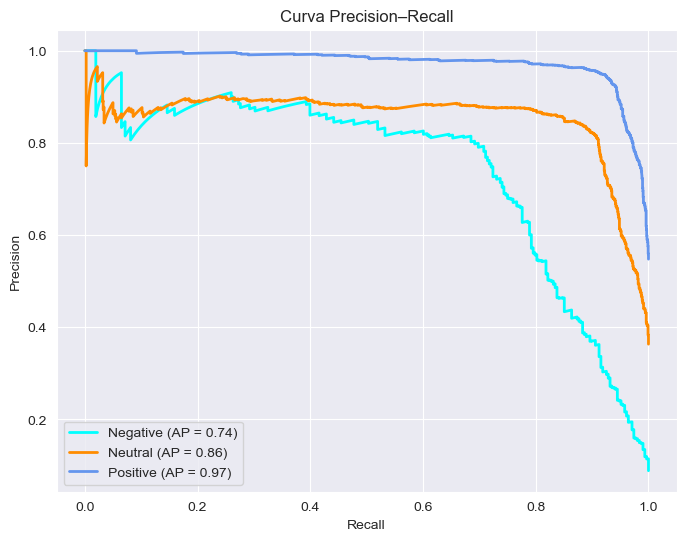

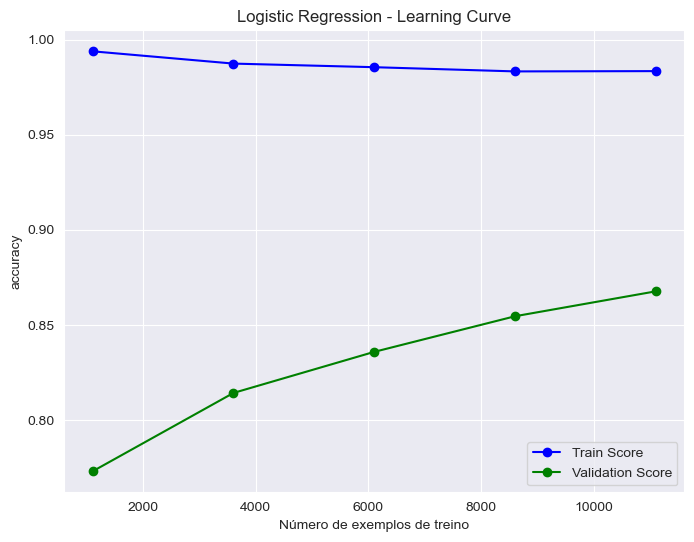

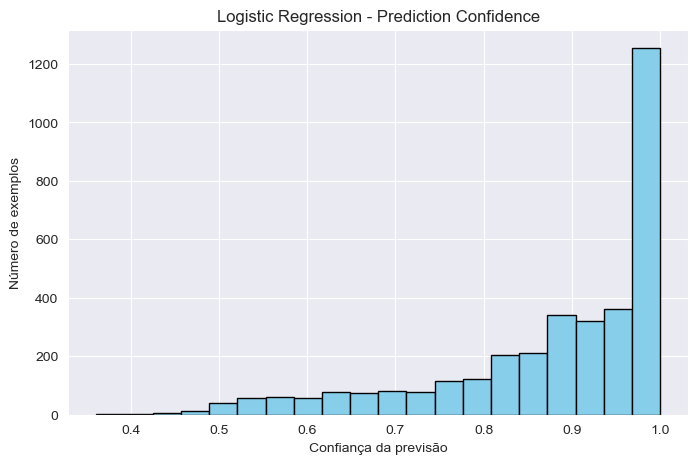


================ Fim da avaliação de Logistic Regression ================



In [181]:
#GRÁFICOS E VISUALIZAÇÕES DE RESULTADOS
#########################################


#imprime matriz de confusão
def plot_confusion_matrix_verbose(model, X_test, y_test, target_names, title="Confusion Matrix"):

    # Previsões
    y_pred = model.predict(X_test)

    # Matriz de confusão
    cm = confusion_matrix(y_test, y_pred)

    # Cálculo de TP, FP, FN por classe
    print(f"\n==== {title} - Detalhes por classe ====")
    for i, class_name in enumerate(target_names):
        TP = cm[i,i]
        FP = cm[:,i].sum() - TP
        FN = cm[i,:].sum() - TP
        TN = cm.sum() - (TP + FP + FN)
        print(f"\nClasse '{class_name}':")
        print(f"  TP = {TP}, FP = {FP}, FN = {FN}, TN = {TN}")

    # Display da matriz de confusão
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=target_names)

    # Plot
    fig, ax = plt.subplots(figsize=(7,6))
    disp.plot(
        ax=ax,
        cmap="Blues",
        values_format="d",
        colorbar=True  # mantém o termómetro
    )
    ax.grid(False)
    plt.title(title)
    plt.show()


#imprime classification report
def plot_classification_report(model, X_test, y_test, target_names,
                                           title="Classification Report"):

    
    y_pred = model.predict(X_test)

    report = classification_report(
        y_test,
        y_pred,
        target_names=target_names,
        output_dict=True
    )


    df = pd.DataFrame(report).transpose()
    df_classes = df.iloc[0:len(target_names)][["precision", "recall", "f1-score"]]

    ax = df_classes.plot(kind="bar", figsize=(9,6))

    # Colocar valores em cima das barras
    for container in ax.containers:
        ax.bar_label(container, fmt="%.2f", fontsize=9)

    plt.title(title)
    plt.ylabel("Score")
    plt.ylim(0, 1.05)
    plt.xticks(rotation=0)
    plt.grid(axis="y")
    plt.show()
    print(classification_report(y_test, y_pred, target_names=target_names))


def plot_model_comparison(models, accuracies, f1_scores, title="Comparação de Modelos (Acurácia e F1-Score)"):
    """
    Plota um gráfico de barras horizontal comparando Accuracy e F1-score de vários modelos.
    
    models: lista de nomes dos modelos
    accuracies: lista de valores de Accuracy correspondentes
    f1_scores: lista de valores de F1-score correspondentes
    """
    
    y_pos = np.arange(len(models))
    height = 0.35  # altura das barras
    
    fig, ax = plt.subplots(figsize=(10,6))
    
    # Barras de Accuracy
    ax.barh(y_pos - height/2, accuracies, height, label="Accuracy", color='skyblue')
    # Barras de F1-score
    ax.barh(y_pos + height/2, f1_scores, height, label="F1-score (weighted)", color='lightgreen')
    
    # Labels
    ax.set_yticks(y_pos)
    ax.set_yticklabels(models)
    ax.set_xlabel("Score")
    ax.set_xlim(0, 1.0)
    ax.set_title(title)
    ax.legend()
    
    # Mostrar valores nas barras
    for i in range(len(models)):
        ax.text(accuracies[i]+0.01, y_pos[i]-height/2, f"{accuracies[i]:.3f}", va='center')
        ax.text(f1_scores[i]+0.01, y_pos[i]+height/2, f"{f1_scores[i]:.3f}", va='center')
    
    plt.tight_layout()
    plt.show()

def plot_roc_curve(model, X_test, y_test, target_names, title="Curva ROC"):
    """
    Plota a curva ROC para modelos multi-classe usando abordagem One-vs-Rest.
    
    model: modelo treinado (deve ter método predict_proba)
    X_test, y_test: dados de teste
    target_names: nomes das classes
    """
    # Binarizar labels para multi-classe
    y_test_bin = label_binarize(y_test, classes=np.arange(len(target_names)))
    n_classes = y_test_bin.shape[1]

    # Prever probabilidades
    y_score = model.predict_proba(X_test)

    # Configurar cores
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])

    plt.figure(figsize=(8,6))
    
    for i, color in zip(range(n_classes), colors):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, color=color, lw=2,
                 label=f'ROC {target_names[i]} (AUC = {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)  # linha diagonal
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()


def plot_precision_recall_curve(model, X_test, y_test, target_names, title="Curva Precision–Recall"):
    """
    Plota a curva Precision–Recall para modelos multi-classe usando One-vs-Rest.
    
    model: modelo treinado (deve ter método predict_proba)
    X_test, y_test: dados de teste
    target_names: nomes das classes
    """
    # Binarizar labels
    y_test_bin = label_binarize(y_test, classes=np.arange(len(target_names)))
    n_classes = y_test_bin.shape[1]

    # Prever probabilidades
    y_score = model.predict_proba(X_test)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])

    plt.figure(figsize=(8,6))
    
    for i, color in zip(range(n_classes), colors):
        precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
        ap = average_precision_score(y_test_bin[:, i], y_score[:, i])
        plt.plot(recall, precision, color=color, lw=2,
                 label=f'{target_names[i]} (AP = {ap:.2f})')
    
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(title)
    plt.legend(loc="lower left")
    plt.grid(True)
    plt.show()



def plot_learning_curve(model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 5), title="Learning Curve"):
    """
    Plota a curva de aprendizagem do modelo.
    
    model: modelo scikit-learn
    X, y: dados de treino completos
    cv: cross-validation folds
    scoring: métrica a usar ('accuracy', 'f1_weighted', etc.)
    train_sizes: frações de dados de treino
    """
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=cv, train_sizes=train_sizes, scoring=scoring, n_jobs=-1
    )
    
    train_scores_mean = train_scores.mean(axis=1)
    val_scores_mean = val_scores.mean(axis=1)
    
    plt.figure(figsize=(8,6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Train Score')
    plt.plot(train_sizes, val_scores_mean, 'o-', color='green', label='Validation Score')
    plt.title(title)
    plt.xlabel('Número de exemplos de treino')
    plt.ylabel(scoring)
    plt.grid(True)
    plt.legend(loc='best')
    plt.show()


def plot_prediction_confidence(model, X_test, y_test, title="Distribuição das Probabilidades de Previsão"):
    """
    Plota a distribuição das probabilidades das previsões do modelo.
    
    model: modelo com predict_proba()
    X_test, y_test: dados de teste
    """
    if not hasattr(model, "predict_proba"):
        print("O modelo não tem predict_proba. Use Logistic Regression, Naive Bayes, ou SVM com probability=True")
        return
    
    proba = model.predict_proba(X_test)
    confidences = proba.max(axis=1)
    
    plt.figure(figsize=(8,5))
    plt.hist(confidences, bins=20, color='skyblue', edgecolor='black')
    plt.title(title)
    plt.xlabel("Confiança da previsão")
    plt.ylabel("Número de exemplos")
    plt.grid(True)
    plt.show()

def evaluate_model(model, X_train, y_train, X_test, y_test, target_names, model_name="Modelo", cv=5):
    """
    Avalia o modelo e gera os principais gráficos de desempenho.
    
    Parâmetros:
    - model: modelo treinado
    - X_train, y_train: dados de treino
    - X_test, y_test: dados de teste
    - target_names: lista com nomes das classes
    - model_name: string para título dos gráficos
    - cv: número de folds para learning curve
    """
    
    print(f"\n================ Avaliando {model_name} ================\n")
    
    # 1️⃣ Matriz de Confusão
    plot_confusion_matrix_verbose(
        model=model,
        X_test=X_test,
        y_test=y_test,
        target_names=target_names,
        title=f"{model_name} - Confusion Matrix"
    )
    
    # 2️⃣ Classification Report (Precision / Recall / F1)
    plot_classification_report(
        model=model,
        X_test=X_test,
        y_test=y_test,
        target_names=target_names,
        title=f"{model_name} - Precision / Recall / F1"
    )
    
    # 3️⃣ Curvas ROC e Precision-Recall
    plot_roc_curve(model, X_test, y_test, target_names)
    plot_precision_recall_curve(model, X_test, y_test, target_names)
    
    # 4️⃣ Curva de Aprendizagem
    plot_learning_curve(model, X_train, y_train, cv=cv, scoring='accuracy', title=f"{model_name} - Learning Curve")
    
    # 5️⃣ Distribuição das Probabilidades (Confidence)
    plot_prediction_confidence(model, X_test, y_test, title=f"{model_name} - Prediction Confidence")
    
    print(f"\n================ Fim da avaliação de {model_name} ================\n")


evaluate_model(
    model=lr,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    target_names=target_names,
    model_name="Logistic Regression"
)


#chamar matriz de confusão
# plot_confusion_matrix(
#     model=rf,
#     X_test=X_test,
#     y_test=y_test,
#     target_names=target_names,
#     title="Logistic Regression - Confusion Matrix"
# )

#chamar classification report
# plot_classification_report(
#     model=lr,
#     X_test=X_test,
#     y_test=y_test,
#     target_names=target_names,
#     title="Logistic Regression - Precision / Recall / F1"
# )

#Chamar Comparação de modelos (em acurácia e f1-score)
# models = ["Logistic Regression", "Naive Bayes", "KNN", "Decision Tree", "SVM", "Random Forest"]
# accuracies = [lr_acc, nb_acc, knn_acc, dt_acc, svm_acc, rf_acc]
# f1_scores = [lr_f1, nb_f1, knn_f1, dt_f1, svm_f1, rf_f1]

# plot_model_comparison(models, accuracies, f1_scores)

# Chamar Curvas ROC e Precision-recall
# plot_roc_curve(lr, X_test, y_test, target_names)
# plot_precision_recall_curve(lr, X_test, y_test, target_names)


# Learning Curve
#plot_learning_curve(lr, X_train, y_train, cv=5, scoring='accuracy')

# Prediction Confidence
#plot_prediction_confidence(lr, X_test, y_test)


